Dieses Notebook ist angelehnt an das Buch *Python Data Science Handbook* von Jake VanderPlas, auch verfügbar auf [GitHubPages](https://jakevdp.github.io/PythonDataScienceHandbook/).

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Principal Component Analysis (PCA)

[Video](https://mstream.hm.edu/paella/ui/watch.html?id=fa5c74d2-2ae9-4292-a7f9-5c822af3884d)

Abgesehen von den einführenden Beispielen haben wir bisher nur *supervised Learning* betrachet, d.h. es waren immer Labels gegeben. Hier betrachten wir zum ersten mal einen *unsupervised* Algorithmus etwas näher, d.h. wir verwenden Daten *ohne* Labels.

**Ziel:** Dimensionsreduktion

**Vorteile/Anwendungsszenarien:**
- Datenaufbereitung als Grundlage für effizientes Lernen (verwendet in 04.03_SVM)
- Visualisierung hochdimensionaler Daten (verwendet in 02.03_API_IrisPCA)
- Filtern von Rauschen
- Feature Engnineering
- Verständnis für Daten erlangen

**Nachteile:**
- "Ausreisser" haben relativ starken Einfluss
- Nicht geeignet für SEHR hochdimensionale Daten
- Betrachtet nur lineare Struktur

## Funktionsweise von PCA
Um die Funktionsweise von PCA bildlich darzustellen, betrachten wir eine Menge von **zwei**dimensionalen Punkten. Diese soll dann von PCA auf eine Menge mit **ein**dimensionalen Punkten reduziert werden.

Wir betrachten folgende 200 Punkte:

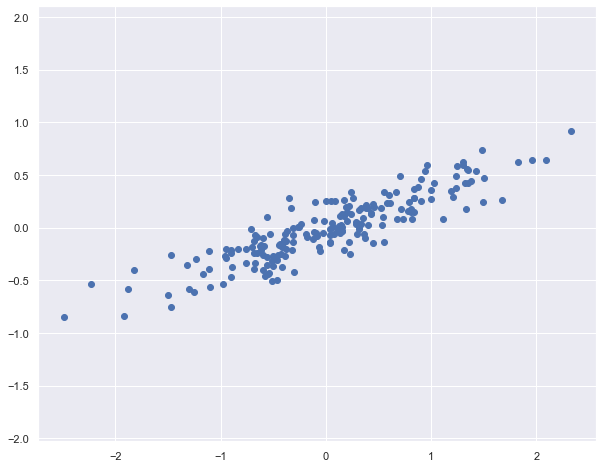

In [18]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Man erkennt, dass diese Punkte "entlang einer Geraden" angeordnet sind. Ähnliche Bilder hatten wir auch bei linearer Regression gesehen. Allerdings war die Aufgabenstellung dort eine andere als jetzt:
- *Lineare Regression:* Lerne ein Modell, mit dem man aus einem x-Wert den y-Wert vorhersagen kann.
- *Dimensionsreduktion:* Lerne den Zusammenhang zwischen den x- und y-Werten.

Konkret geht es bei PCA darum, die "wichtigsten Achsen" der Daten zu lernen. Bezogen auf diese ist der Zusammenhang der Daten dann einfacher.

In ``sklearn`` ist PCA vorhanden als ``PCA`` Estimator:

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Was wird hier "gelernt"? Im Wesentlichen sind es die wichtigesten ``n_components`` Komponenten und die damit erklärbare Varianz der Daten:

In [52]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [53]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Wir visualisieren diese Größen, indem wir die ``pca.components_`` als Richtungen von Vektoren auffassen, welche ``pca.explained_vaiance_`` lang sind:

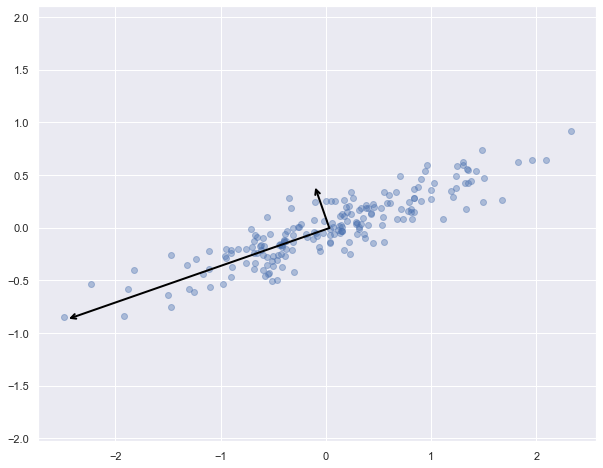

In [54]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Die Vektoren beschreiben also die wesentlichen Achsen der Daten, deren Länge gibt an, wie wichtig jede einzelne Achse ist. Genauer gesagt gibt die Länge des Vektors die Varianz der Daten "in der entsprechenden Richtung" an. Projiziert man einen einzlnen Datenpunkt auf diese Achsen, so erhält man dessen "Principal Components".

Für unsere Daten:

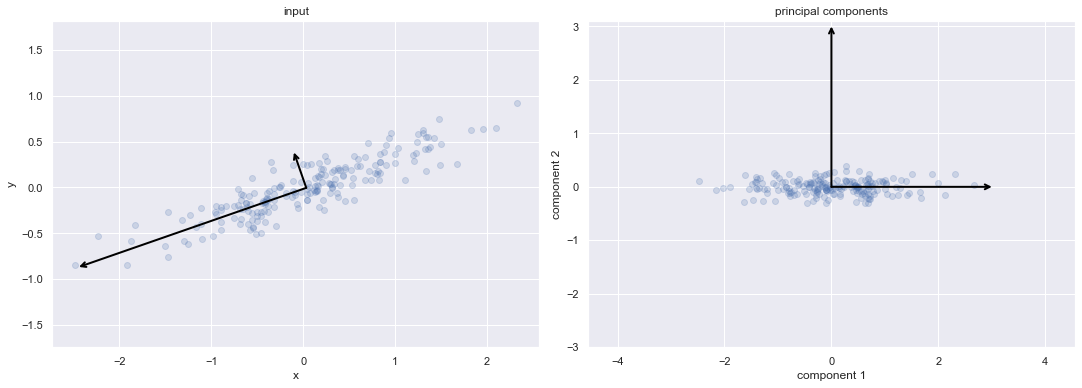

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));

## PCA als Dimensionsreduktion
Sollte sich nun herausstellen, dass die Daten entlang einiger der wesentlichen Achsen nur sehr wenig Varianz aufweisen, so liegt es nahe, dass man diese Achsen vernachlässigt/entfernt. Man hat somit die Dimension reduziert. Mathematischer formuliert: die Daten werden aus einem hochdimensionalen Raum (der mit allen Achsen) in einen niedriger dimensionalen Raum (der ohne die entfernten Achsen) projiziert.

Um bei dieser Reduktion möglichst wenig Information zu verlieren, bestimmt man zuvor die wesentlichen Achsen und entfernt davon diejenigen, die am unwichtigsten sind.

Auf diese Weise werden die Daten *transformiert*, in ``sklearn`` verwendet man folglich die ``.transform`` Methode. Wir wenden diese auf unsere (zweidimensionalen) Daten an und reduzieren sie auf die eine wichtigste Achse:

In [56]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Die transformierten Daten sind also nur noch eindimensional. Um sie mit den Originaldaten zusammen zu visualisieren und damit den Zusammenhang bildlich zu machen, transformieren wir sie zurück ins Zweidimensionale:

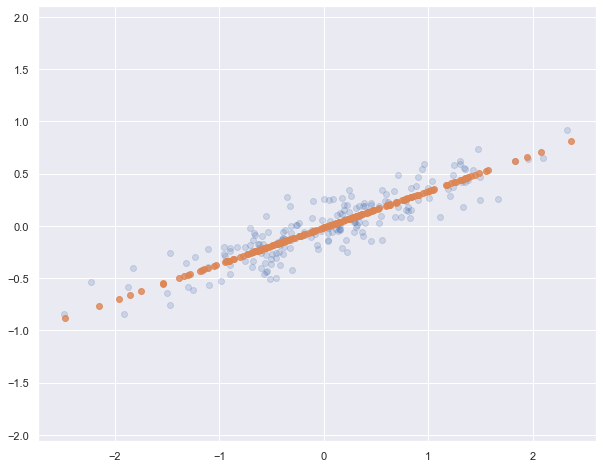

In [57]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Wie vermutet/gewünscht wurde die "unwichtigste" Richtung (also die, entlang derer die Daten die kleinste Varianz aufweisen) entfernt. Diese Information ist durch die Dimensionsreduktion verloren gegangen — aber wir hatten ja auch die Dimension halbiert!

## PCA für Visualisierung hochdimensionaler Daten
Diese Anwendung hatten wir bereits im Praktikum 2 ("Handschriftliche Ziffern"). Dort hatten wir Bilder von handschriftlich geschriebenen Ziffern untersucht. Diese Bilder bestanden aus 8x8 Pixeln, jeder Datenpunkt war somit 64 dimensional. Um einen ersten Eindruck von den Daten zu bekommen, ist es oft nützlich, diese zu visualisieren — das ist in 64 Dimensionen aber nicht möglich... Daher wollen wir PCA verwenden, um aus den 64 vorliegenden Dimensionen die 2 wichtigsten (bezogen auf den vorliegenden Datensatz) zu bestimmen und die Daten auf diese zwei Dimensionen zu projizieren:

In [58]:
# load data
from sklearn.datasets import load_digits
digits = load_digits()

# project from 64 to 2 dimensions
pca = PCA(n_components=2)  
projected = pca.fit_transform(digits.data)
print('Form der Originaldaten: ', digits.data.shape)
print('Form der transformierten Daten: ', projected.shape)

Form der Originaldaten:  (1797, 64)
Form der transformierten Daten:  (1797, 2)


Die auf zwei Dimensionen reduzierten Daten können wir nun gut darstellen (1. Komponenten: x-Achse; 2. Komponente: y-Achse; Label: Farbe):

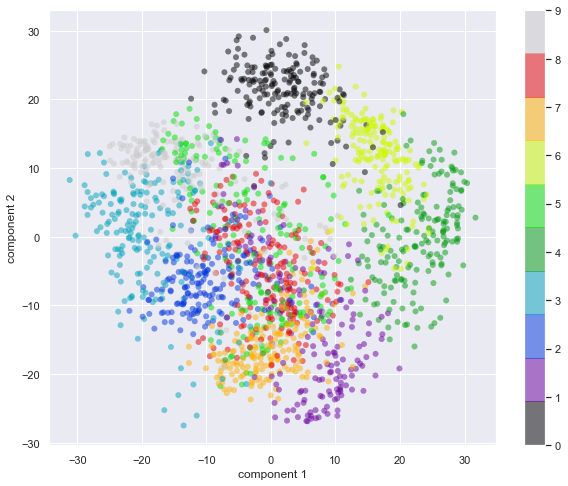

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Interpretation der Komponenten
Um die Komponenten zu verstehen, machen wir uns klar, dass die 64 dimensionale Repräsentation der Daten sich auf eine spezielle Basis bezieht, in obigem Beispiel sind das die von links oben nach rechts unten durchnummerierten Pixel
$$
x = (x_1, x_2, x_3 \cdots x_{64}).
$$
Das Bild ergibt sich somit als
$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$
Wenn wir nun die Dimension verringern wollen, bedeutet das, dass einige der Komponenten von $x$ weggelassen werden müssen. Naiver Ansatz: Verwende nur die ersten paar Einträge und entferne alle anderen.

Beispiel: Wir wollen nur acht-dimensionale Daten (d.h. Reduktion um 87.5%).

![](figures/05.09-digits-pixel-components.png)

Das wird wohl nicht so gut sein...

Aber: Wir können auch eine andere Basis wählen. PCA wählt eine in gewisser Weise optimale Basis. Das analoge Bild mit der von PCA erzeugten Basis ist:

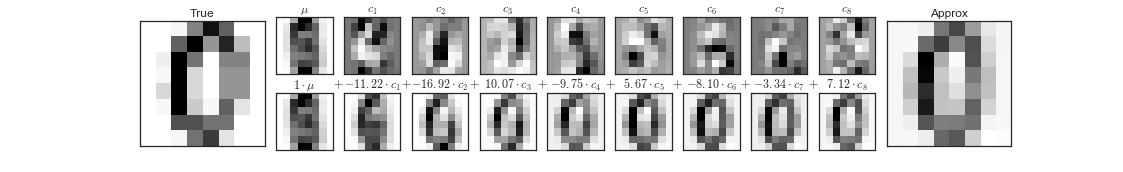

## Mathematisch(er)e Sicht: PCA als optimale Projektion
Eine andere Sichtweise auf PCA ist folgende:

Gegeben sind $m$ Datenpunkte $x_1, \dots, x_m\in\mathbb{R}^d$. Wir würden gerne die Dimension dieser Daten durch eine lineare Transformation reduzieren, sprich durch eine Abbildung
$$ x\mapsto Wx \qquad\text{mit }W\in\mathbb{R}^{n\times d},\ n<d.$$
Somit ist $y=Wx\in\mathbb{R}^n$ die niedrigdimensionale Darstellung von $x\in\mathbb{R}^d$. Nun kann eine lineare Transformation $U\in\mathbb{R}^{d\times n}$ verwendet werden, um aus der komprimierten Darstellung $y$ das ursprüngliche $x$ (ungefähr) zu rekonstruieren. Der somit erhaltene Vektor $\tilde{x}=Uy$ liegt damit wieder in dem hochdimensionalen Raum $\mathbb{R}^d$ und "sollte nahe bei $x$" sein.

Bei PCA konkretisiert man dieses "*sollte nahe bei $x$ sein*", indem man fordert, dass die **Summe der Abstandsquadrate** zwischen den Originaldaten und den wie beschrieben rekonstruierten Daten minimal sein soll. Es gilt also, zwei Matrizen $W\in\mathbb{R}^{n\times d}$ und $U\in\mathbb{R}^{d\times n}$ zu finden, so dass
$$ \sum_{i=1}^m ||x_i-UWx_i||_2^2$$
minimal ist.

Es lässt sich (mit ein bisschen linearer Algebra) zeigen, dass die Lösung dieses Problems mit der Matrix $A=\sum_{i=1}^m x_i x_i^T$ zu tun hat (diese ist rein durch die gegebenen Daten definiert). Konkret: die Spalten der Matrix $U$ sind die Eigenvektoren der Matrix $A$, die zu den größten $n$ Eigenwerten gehören. Die Matrix $W$ ist gegeben als $W=U^T$.

Somit sind die Vektoren der bestmöglich an die Daten angepassten Basis genau die Eigenvektoren von $A$ in absteigender Reihenfolge der Eigenwerte.

## Wie viele Komponenten sollte man verwenden?
Dies ist die wesentliche Frage bei PCA. Deren Antwort hängt ausschließlich von den zugrunde liegenden Daten ab.

Man möchte möglichst viel Information behalten aber die Dimension auch möglichst stark verringern. Um einen ausgewogenen Mittelweg zu finden, biete es sich an, die kumulierte erfasste Varianz zu betrachten:

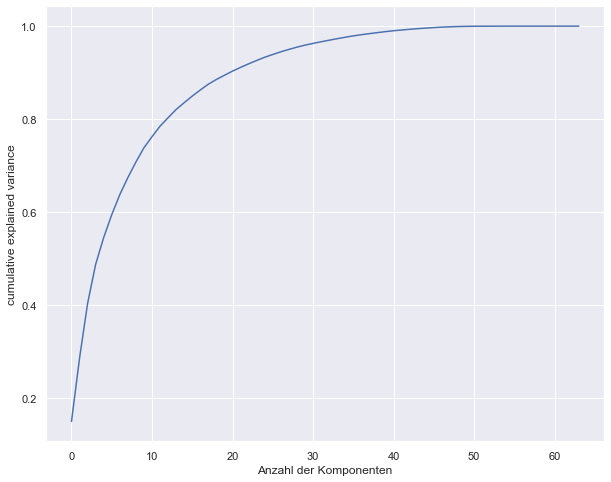

In [60]:
plt.figure(figsize=(10,8))
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('cumulative explained variance');

Wir sehen, dass die ersten 10 Komponenten ca. 75% der gesamten Varianz erklären. Um 90% zu erreichen, benötigen wir ca. 20 Komponenten, nahezu 100% werden erreicht ab ca. 50 Komponenten. Unsere zweidimensionale Darstellung oben ist also wohl nicht allzu aussagekräftig, denn sie erklärt nur knapp 29% der gesamten Varianz.

In [61]:
pca.explained_variance_ratio_[:2].sum()

0.285093648236993

In hochdimensionelane Daten kann ein solcher Plot eine Aussage darüber geben, wie redundant die Daten sind.

## PCA zum Filtern von Rauschen
Verrauschte Daten können durch PCA oft verbessert werden. Die zugrunde liegende Idee ist die, dass das Rauschen typischerweise schwächer ist als das eigentliche Signal. Daher sollten die "wichtigsten Achse" zu den relevanten Daten gehören, die weniger wichtigen Achsen zu Rauschen.

Als Beispiel betrachten wir wieder die Zahlen von oben:

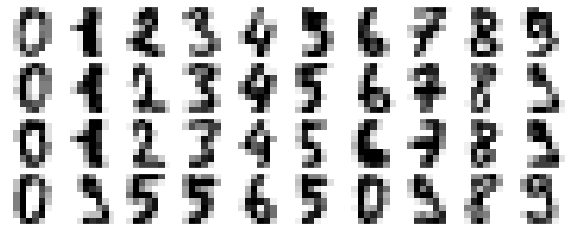

In [62]:
# Hilffunktion zum Plotten
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

Nun verrauschen wir diese Daten und plotten sie erneut:

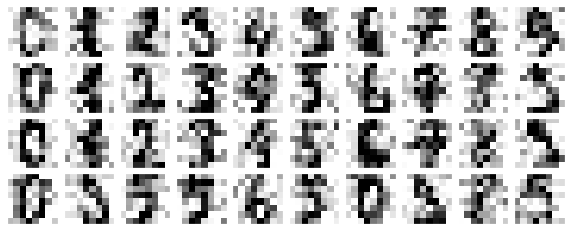

In [63]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Auf diesen verrauschten Daten trainieren wir nun PCA. Wir geben nicht vor, wie viele Komponenten wir verwenden wollen, sondern geben vor, dass 50% der Varianz erklärt werden soll:

In [64]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

In [65]:
pca.explained_variance_ratio_

array([0.08846308, 0.0810677 , 0.07152046, 0.05162958, 0.03897967,
       0.03443116, 0.03089886, 0.02832579, 0.02607449, 0.0239026 ,
       0.02011339, 0.01948981])

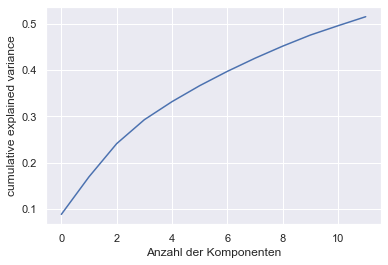

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('cumulative explained variance');

Hier reichen also 12 Komponenten aus, um 50% der Varianz zu erklären. Nun transformieren wir die ``noisy`` Daten, indem wir sie auf diese 12 Komponenten reduzieren. Anschließend verwenden wir die inverse Transformation, um daraus wieder die vollen 64-dimensionalen Daten zu rekonstruieren:

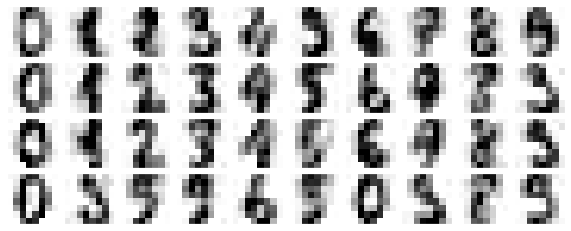

In [67]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

PCA kann also Rauschen entfernen. Daher bietet es sich gerade bei hochdimensionalen Daten an, einen Klassifizierungsalgorithmus auf den durch PCA reduzierten Daten zu trainieren als auf den (möglicherweise mit Rauschen belegten) Originaldaten.

## Beispiel: Eigenfaces
Bei der Gesichtserkennung mit SVM hatten wir vorab eine Dimensionsreduktion mit PCA durchgeführt (Verringerung der 2914-dimensionalen Daten auf 150 Dimensionen). Wir wollen nun untersuchen, wie diese Reduktion zustande kam:

In [38]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Da es sich hierbei um recht hochdimensionale Daten handelt, biete es sich an, eine randomisierte Variante zu verwenden. Dabei wird eine Methode verwendet, die sehr schnell eine Approximation der ersten $N$ wichtigsten Komponenten berechnen kann.

In [68]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

PCA hat durch ``.fit()`` nun die wichtigsten Achsen ("Eigenvektoren") der Daten gelernt.

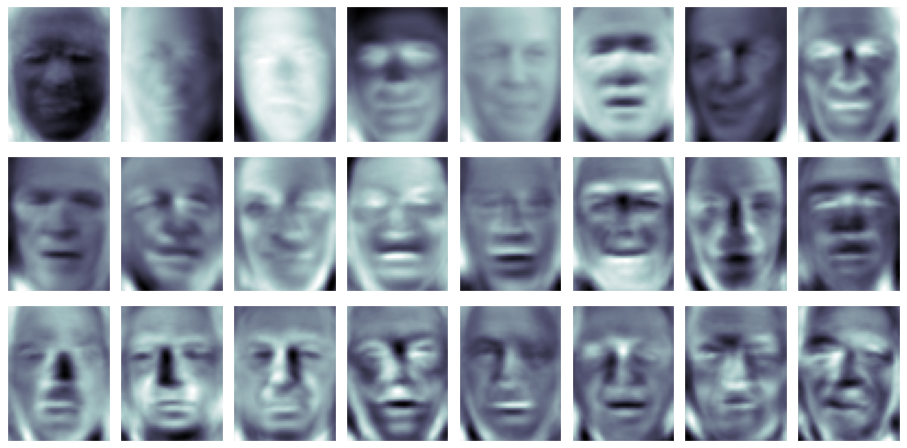

In [45]:
fig, axes = plt.subplots(3, 8, figsize=(16, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Diese Visualisierung der Eigenvektoren ("Eigenfaces") lassen eine Interpretation zu: Die ersten Eigenfaces scheinen mit der Beleuchtung zusammenzuhängen, später scheint es mehr um Bereiche des Gesichts zu gehen (Nase, Mund, ...).

Hier die Kurve der kummulierten erklärten Varianz:

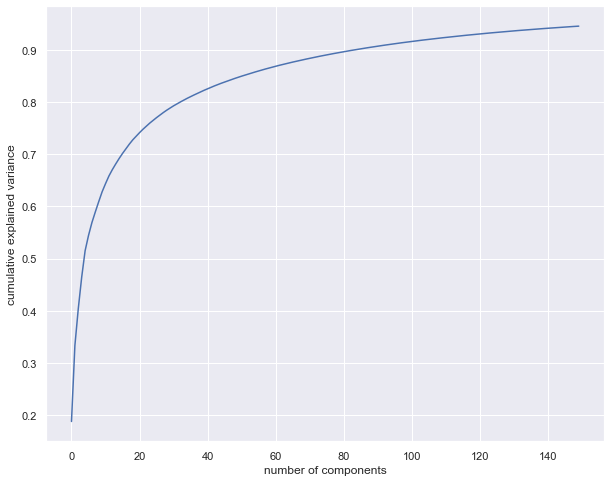

In [69]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Die verwendeten 150 Komponenten (von insgesamt fast 3000) erfassen mehr als 90% der gesamten Varianz. Daher scheint eine Reduktion auf diese sinnvoll zu sein.

Bildlich lässt sich der Informationsverlust gut erfassen, wenn wir die Originalbilder den (aus den 150 Komponenten ) rekonstruierten Bildern gegenüberstellen:

In [70]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

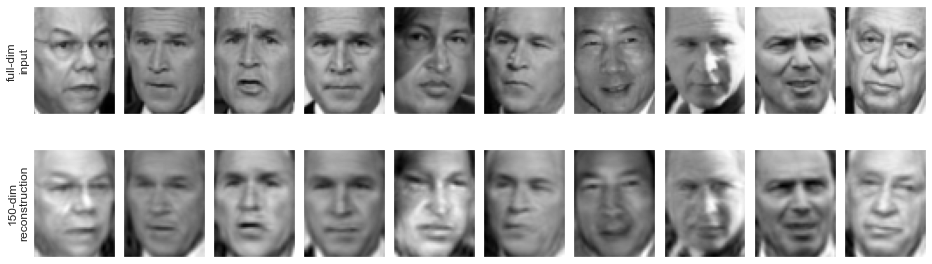

In [71]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(16, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Diese 150 dimensionale Darstellung der Bilder hatten wir in 04.03_SVM verwendet, um die Bilder nach den abgebildeten Personen zu klassifizieren.